In [ ]:
!pip install split-folders matplotlib opencv-python spicy

In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import splitfolders
from sklearn.metrics import confusion_matrix
import seaborn as sns
# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/ResNet/train", output="/content/drive/MyDrive/ResNet/split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

In [ ]:
class_names = ['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/ResNet/split/train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary")

Found 1928 images belonging to 5 classes.


In [ ]:
valid_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/ResNet/split/val/",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 550 images belonging to 5 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/ResNet/split/test",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 280 images belonging to 5 classes.


In [ ]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [ ]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [ ]:
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
61/61 [==============================] - 18s 225ms/step - loss: 1.5559 - accuracy: 0.3283 - val_loss: 1.1705 - val_accuracy: 0.5382
Epoch 2/10
61/61 [==============================] - 12s 202ms/step - loss: 1.1846 - accuracy: 0.5119 - val_loss: 0.8801 - val_accuracy: 0.6709
Epoch 3/10
61/61 [==============================] - 12s 194ms/step - loss: 0.9698 - accuracy: 0.6183 - val_loss: 0.7040 - val_accuracy: 0.7764
Epoch 4/10
61/61 [==============================] - 12s 196ms/step - loss: 0.8034 - accuracy: 0.6955 - val_loss: 0.5442 - val_accuracy: 0.8382
Epoch 5/10
61/61 [==============================] - 14s 227ms/step - loss: 0.7504 - accuracy: 0.7381 - val_loss: 0.5421 - val_accuracy: 0.8473
Epoch 6/10
61/61 [==============================] - 11s 179ms/step - loss: 0.6097 - accuracy: 0.7941 - val_loss: 0.4753 - val_accuracy: 0.8473
Epoch 7/10
61/61 [==============================] - 11s 185ms/step - loss: 0.5223 - accuracy: 0.8252 - val_loss: 0.4709 - val_accuracy: 0.8582

In [ ]:
y_pred = model.predict(test_generator)
cm = confusion_matrix(, y_pred)

9/9 [==============================] - 2s 178ms/step


ValueError: ignored

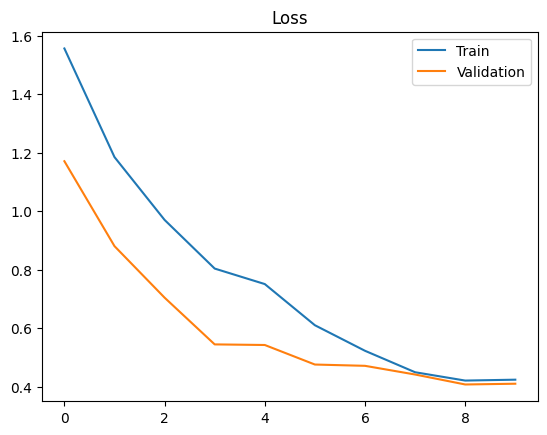

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()


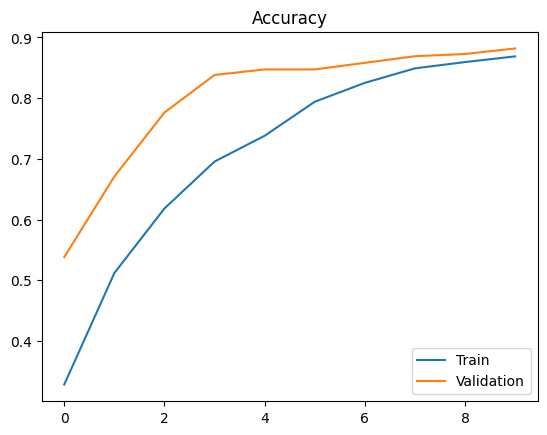

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

9/9 [==============================] - 2s 164ms/step - loss: 0.4297 - accuracy: 0.8643
The test loss is:  0.42968273162841797
The best accuracy is:  86.42857074737549


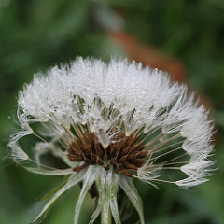

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/ResNet/split/test/dandelion/10946896405_81d2d50941_m.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])
img

In [ ]:
prediction = model.predict(img_array)
print(prediction)

1/1 [==============================] - 2s 2s/step
[[2.7856525e-04 9.9968195e-01 1.9986208e-08 3.8238468e-05 1.1398566e-06]]


In [ ]:
class_id = np.argmax(prediction, axis = 1)
print(class_id)
class_names[class_id.item()]

[1]


'dandelion'

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          